In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loaddataset
df = pd.read_csv('/content/data_news - data_news.csv')

In [3]:
df

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods
...,...,...,...,...,...
49995,SPORTS,This Baseball Team Learned There's A Wrong Way...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night
49996,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs
49997,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie
49998,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN


In [ ]:
print(df.isnull().sum())

category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64


In [6]:
df['keywords'].fillna('Unknown', inplace=True)

In [5]:
print(df.duplicated().sum())

4251


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df.drop(columns=['keywords'])

In [ ]:
df

,category,headline,links,short_description
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf..."
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a..."
...,...,...,...,...
49988,SPORTS,Gregg Popovich Wishes He ‘Had The Guts’ To Dye...,https://www.huffingtonpost.com/entry/gregg-pop...,Monday’s events beg the question -- would a bl...
49991,SPORTS,"Rafal Lipinski Nails Sick, Complicated Dunk",https://www.huffingtonpost.com/entry/rafal-lip...,"Plenty of air, plenty to do"
49995,SPORTS,This Baseball Team Learned There's A Wrong Way...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...
49996,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change."


In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
from nltk.corpus import stopwords

In [9]:
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens=[token.strip()for token in tokens]

    filtered_tokens=[]
    for token in tokens:
      if token.lower() not in stopwords.words('english'):
        filtered_tokens.append(token)

    return ' '.join(filtered_tokens)

In [10]:
bookmark=df.copy()

In [11]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.map(remove_stopwords))

In [13]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def porter_stemmer(text):
    if not isinstance(text, str):  # Ensure input is a string
        return text

    stemmed_words = [porter.stem(word) for word in word_tokenize(text)]

    return ' '.join(stemmed_words)


In [14]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.map(porter_stemmer))

In [15]:

from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()

df['category']=lb.fit_transform(df['category'])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer()

In [24]:
X_text = df[['headline', 'links', 'short_description', 'keywords']]
y = df['category']

In [18]:
'''#alloting X and Y
X= df.iloc[:, 1:]
y= df.iloc[:,0]

In [25]:
# Convert text columns to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)


In [26]:
# Applying vectorization separately
X_headline = vectorizer.fit_transform(X_text['headline'].astype(str))
X_links = vectorizer.fit_transform(X_text['links'].astype(str))
X_short_desc = vectorizer.fit_transform(X_text['short_description'].astype(str))
X_keywords = vectorizer.fit_transform(X_text['keywords'].astype(str))

In [28]:
# Combining all text feature vectors
from scipy.sparse import hstack

X = hstack([X_headline, X_links, X_short_desc, X_keywords])

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Initialize and train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = lr.predict(X_test)

In [32]:
# Print predictions
print(y_pred[:10])

[0 0 0 0 0 1 0 0 0 0]


In [36]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score, classification_report,f1_score,precision_score,recall_score

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"\nMacro F1-Score: {f1:.4f}")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Macro Precision: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='macro')
print(f"Macro Recall: {recall:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9607

Macro F1-Score: 0.8745
Macro Precision: 0.9194
Macro Recall: 0.8401

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9045
           1       0.87      0.69      0.77       955

    accuracy                           0.96     10000
   macro avg       0.92      0.84      0.87     10000
weighted avg       0.96      0.96      0.96     10000



# **Visualtization**

In [38]:
# Count each category
category_counts = df['category'].value_counts()
category_counts

,count
category,
0,45000
1,5000


In [39]:
bookmark2=df.copy()

<ipython-input-41-67c49eb96cee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


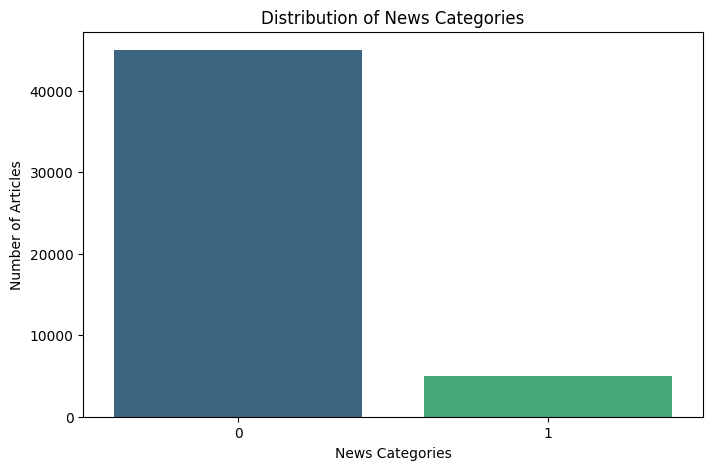

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel("News Categories")
plt.ylabel("Number of Articles")
plt.title("Distribution of News Categories")
plt.show()

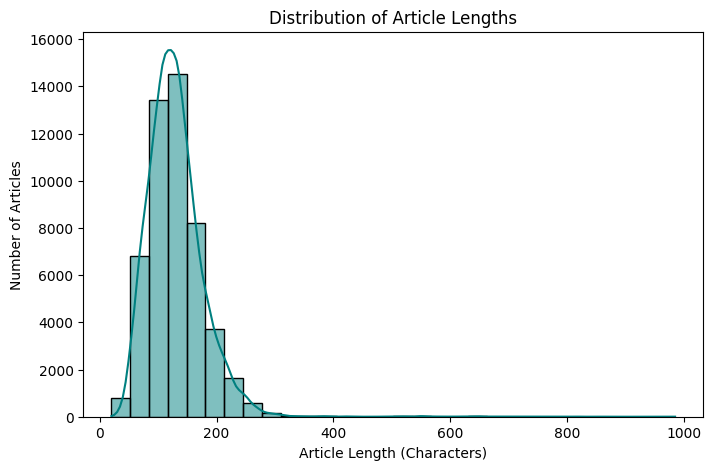

In [42]:
# Calculate text length

df['text_length'] = df['headline'].astype(str).apply(len) + df['short_description'].astype(str).apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=30, kde=True, color='teal')
plt.xlabel("Article Length (Characters)")
plt.ylabel("Number of Articles")
plt.title("Distribution of Article Lengths")
plt.show()

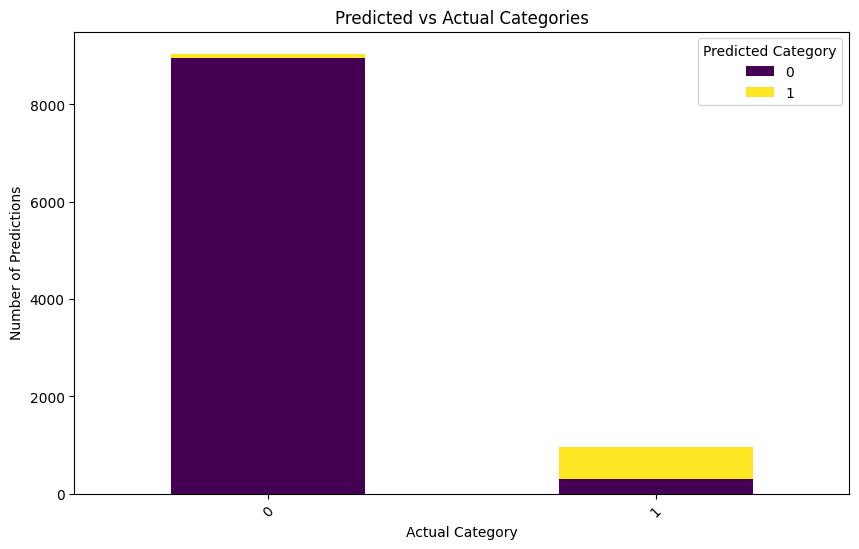

In [43]:
# Create DataFrame of actual vs. predicted categories
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_counts = results_df.groupby(['Actual', 'Predicted']).size().unstack().fillna(0)

#chart
comparison_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel("Actual Category")
plt.ylabel("Number of Predictions")
plt.title("Predicted vs Actual Categories")
plt.legend(title="Predicted Category")
plt.xticks(rotation=45)
plt.show()